In [2]:
#importing the packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #for splitting data into training and testing datasets
from sklearn.linear_model import LinearRegression #we'll use Linear Regression algorithm here
from sklearn import metrics
%matplotlib inline

In [4]:
our_url = 'http://bit.ly/w-data'
s_marks = pd.read_csv(our_url) #reading in our data via the url
s_marks.head(10) #return the first 10 rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
s_marks.describe() #describing our data on a high level (counts and distribution)

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
s_marks.isnull().sum() #will give the missing values

Hours     0
Scores    0
dtype: int64

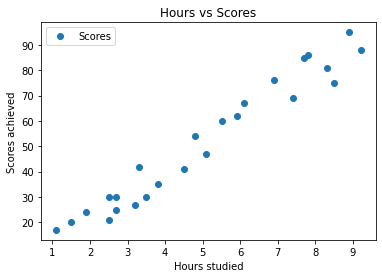

In [7]:
#plotting a 2D graph for our points

s_marks.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Scores')
plt.xlabel('Hours studied')
plt.ylabel('Scores achieved')
plt.show()

In [8]:
#slpitting our data into features (attributes) and labels (what we are predicting)

features = s_marks.iloc[:, :-1].values
labels = s_marks.iloc[:, 1].values

In [9]:
#dividing our full dataset into training and test dataset (80% and 20% respectively)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)
print(len(labels), len(y_train), len(y_test)) #checking the divide

25 20 5


In [10]:
#training our model by fitting on the training data

regressor = LinearRegression() #instantiating the model class
regressor.fit(X_train, y_train)
print('Training done')

Training done


In [11]:
#prediction on the training data

train_pred = regressor.predict(X_train)
train_pred

array([39.67865467, 20.84840735, 79.32128059, 70.40168976, 12.91988217,
       52.56250809, 78.33021494, 34.72332643, 84.27660883, 93.19619966,
       62.47316457, 36.70545772, 28.77693254, 56.52677068, 28.77693254,
       86.25874013, 26.79480124, 49.58931115, 90.22300272, 46.6161142 ])

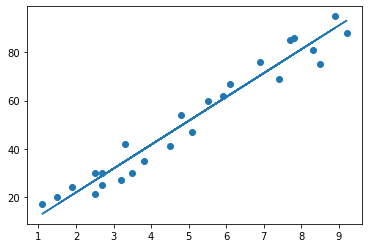

In [12]:
#plotting the regression line

line = regressor.coef_*features+regressor.intercept_
plt.scatter(features, labels)
plt.plot(features, line)
plt.show()

In [13]:
#baseline performance metric (MAE) on training set - always a good practice

print(f'The Mean Absolute Error is: {metrics.mean_absolute_error(y_train, train_pred)}')

The Mean Absolute Error is: 5.186601709180368


In [14]:
#since our model is ready, we shall fit it on test data and predict

print(X_test)
y_pred = regressor.predict(X_test)
y_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [15]:
#comparing actual scores with predicted scores

df= pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [16]:
#now it's time to predict score(percentage) of a student who studied for 9.25 hrs

hours = 9.25
own_pred = regressor.predict([[hours]]) #without array it's giving a valueerror, no idea why?
print(f'number of hours studied: {hours}')
print(f'score achieved: {own_pred}')

number of hours studied: 9.25
score achieved: [93.69173249]


In [17]:
#calculating the performance metric(MAE) on testing data, if it's lower than the MAE of naive data(training data), the model is good

print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred)}')

Mean Absolute Error: 4.183859899002975
